In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("train.csv")

# Step 1: Basic info
print("Dataset shape:", df.shape)
print("\nColumns and types:\n", df.dtypes)
print("\nMissing values per column:\n", df.isnull().sum())

# Step 2: Summary statistics
print("\nSummary statistics for numeric features:\n", df.describe())

# Step 3: Number of categorical vs numeric features
categorical = df.select_dtypes(include=["object"]).columns
numeric = df.select_dtypes(exclude=["object"]).columns
print(f"Number of categorical features: {len(categorical)}")
print(f"Number of numeric features: {len(numeric)}")


Dataset shape: (1460, 81)

Columns and types:
 Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

Missing values per column:
 Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Summary statistics for numeric features:
                 Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000  

In [4]:
correlation = df.select_dtypes(include=['number']).corr()["SalePrice"].sort_values(ascending=False)
print(correlation)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

Number of categorical features: 43
Categorical features:
 ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Unique category counts:
 Neighborhood     25
Exterior2nd      16
Exterior1st      15
Condition1        9
SaleType          9
HouseStyle        8
RoofMatl          8
Condition2        8
Functional        7
BsmtFinType2      6
RoofStyle         6
BsmtFinType1      6
SaleCondition     6
Heating           6
Foundation        6
GarageType        6
ExterCond       

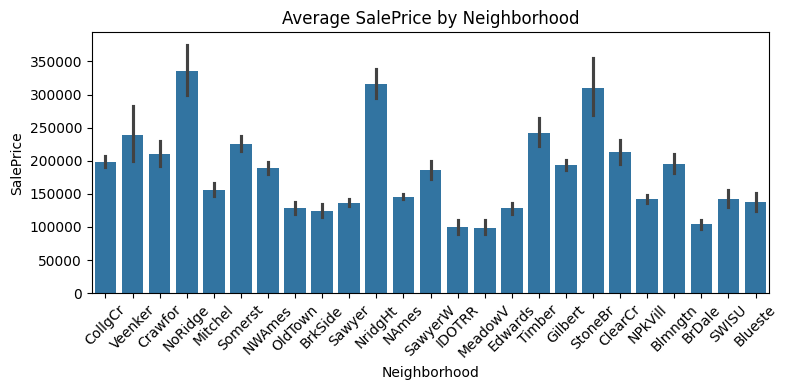

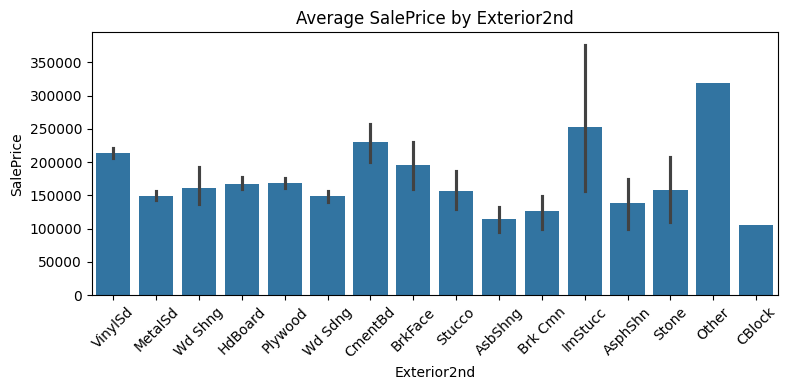

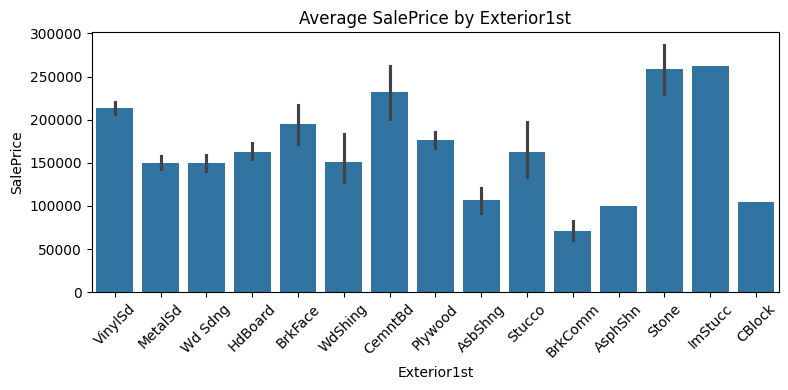

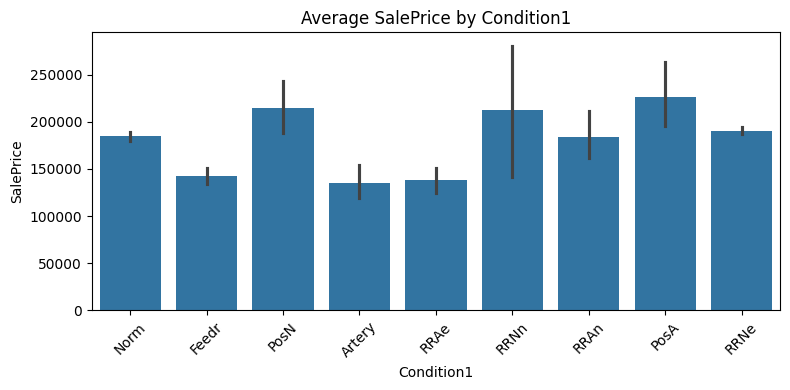

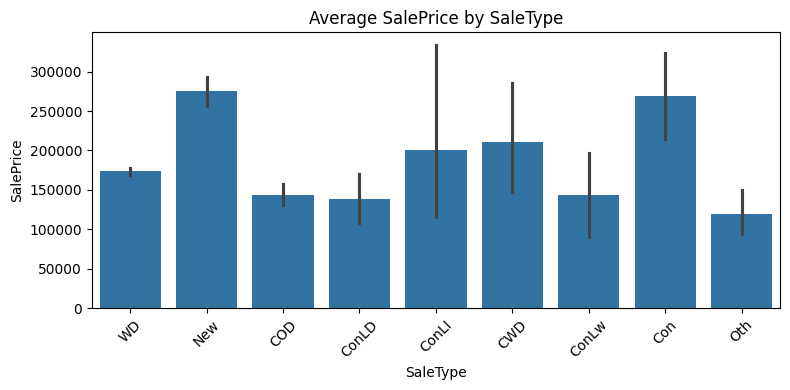

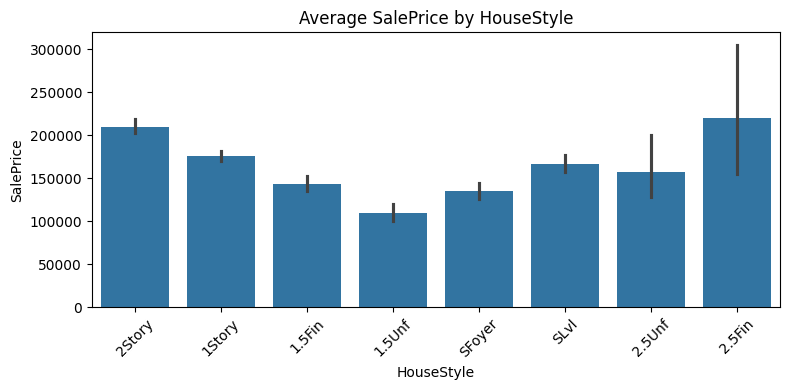

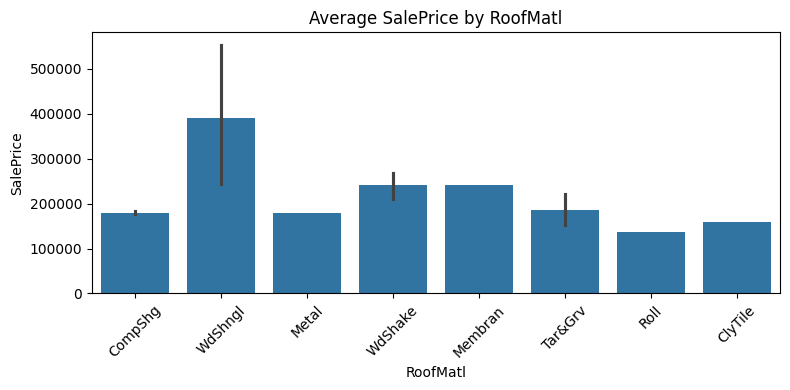

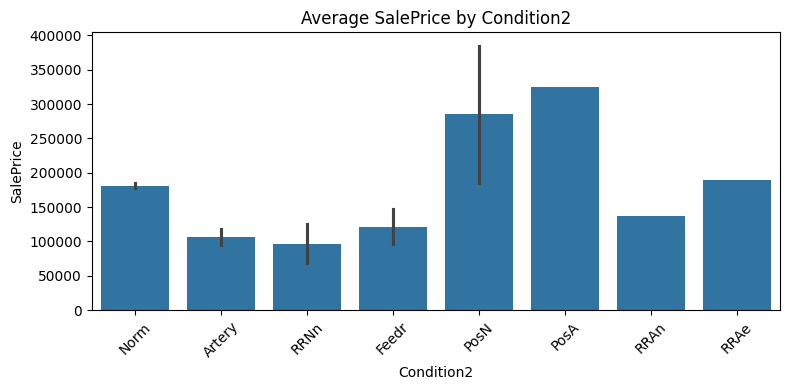

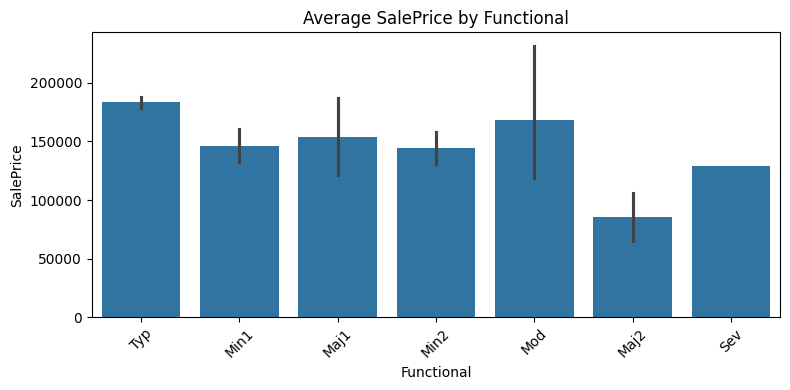

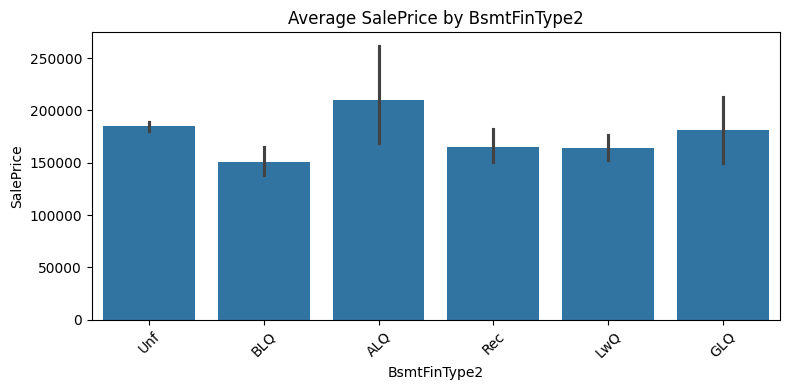

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

categorical_cols = df.select_dtypes(include=["object"]).columns
print(f"Number of categorical features: {len(categorical_cols)}")
print("Categorical features:\n", categorical_cols.tolist())

# Step 1: Show number of unique categories per column
unique_counts = df[categorical_cols].nunique().sort_values(ascending=False)
print("\nUnique category counts:\n", unique_counts)

# Step 2: For top categorical columns (say 10), show average SalePrice per category
top_cats = unique_counts.head(10).index

for col in top_cats:
    plt.figure(figsize=(8, 4))
    sns.barplot(x=df[col], y=df["SalePrice"], estimator="mean")
    plt.title(f"Average SalePrice by {col}")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Step 1: Impute LotFrontage
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median())
)

# Step 2: Select useful features
selected_features = [
    "OverallQual", "GrLivArea", "GarageCars", "TotalBsmtSF",
    "1stFlrSF", "FullBath", "YearBuilt", "YearRemodAdd",
    "Neighborhood", "HouseStyle", "Exterior1st", "Functional", "CentralAir"
]

X = df[selected_features]
y = df["SalePrice"]

# Step 3: Encode categorical features
cat_cols = X.select_dtypes(include=["object"]).columns

le_dict = {}
for col in cat_cols:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])
    le_dict[col] = le

# Step 4: Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training shape:", X_train.shape)
print("Test shape:", X_test.shape)


Training shape: (1168, 13)
Test shape: (292, 13)


/tmp/ipython-input-1593151929.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-1593151929.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[col] = le.fit_transform(X[col])
/tmp/ipython-input-1593151929.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guid

In [55]:
from xgboost import XGBRegressor

model = XGBRegressor(
    objective="reg:squarederror",
    max_depth=4,
    learning_rate=0.1,
    n_estimators=200,
    subsample=0.9,
    colsample_bytree=0.8,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)


In [59]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("RMSE:", rmse)
print("R² score:", r2)

RMSE: 26948.762049489396
R² score: 0.9053187966346741


In [60]:
import joblib

# Save trained model
joblib.dump(model, "house_price_model.pkl")

# Save LabelEncoders for categorical columns
joblib.dump(le_dict, "label_encoders.pkl")


['label_encoders.pkl']